# Medical Cost Analysis Project

## Group Members:
- Bradon Barfuss
- Belal Glab
- Carsten Scholle

## Dataset:
[Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)

## Overview:
The **"Medical Cost Personal Datasets"** contains information related to medical insurance costs billed by health insurance providers in the United States. This dataset includes a variety of factors commonly used by insurance companies to calculate premiums or predict medical expenses for individuals. These factors include demographic details like age, sex, and region, as well as health-related indicators such as body mass index (BMI), smoking status, and the number of children.

### Objective:
The purpose of this analysis is to explore the **Medical Cost Personal Datasets** and answer the following three research questions:

### Research Questions:

1. **What is the correlation between smoking and medical costs?**
   - Smoking has significant impacts on health, which affects medical costs. This analysis aims to quantify the relationship between smoking habits and the overall medical charges billed to individuals.

2. **How do medical costs compare between males and females?**
   - This question investigates whether there are any notable differences in medical expenses based on gender. Understanding whether gender influences medical charges provides insights into how health insurance premiums are calculated for different populations.

3. **Based on age and gender, what combination of BMI, number of children, and smoking status results in the lowest medical costs?**
   - The goal is to identify which factors or combinations of factors—such as age, gender, BMI, number of dependents, and smoking status—result in the lowest medical expenses. This analysis helps predict which demographic and health profiles are associated with reduced healthcare costs.

Through this exploration, we aim to uncover meaningful insights that help better understand how health-related and demographic variables influence medical insurance costs.

## Dataset Features:
- **age**: Age of the primary beneficiary.
- **sex**: Gender of the beneficiary (male, female).
- **bmi**: Body mass index, a numerical value representing body fat based on height and weight.
- **children**: Number of dependents covered under the beneficiary’s health insurance.
- **smoker**: Smoking status (yes, no).
- **region**: Residential area in the United States (northeast, northwest, southeast, southwest).
- **charges**: Individual medical costs billed by health insurance.

|    | Column   | Dtype   | Non-Null Count | Null Count | Unique | Top       | Freq | Mean       | Std         | Min     | 25%       | 50%     | 75%       | Max      |
|----|----------|---------|----------------|------------|--------|-----------|------|------------|-------------|---------|-----------|---------|-----------|----------|
|  0 | age      | int64   | 1338           | 0          | nan    | nan       | nan  | 39.207     | 14.05       | 18      | 27        | 39      | 51        | 64       |
|  1 | sex      | object  | 1338           | 0          | 2      | male      | 676  | nan        | nan         | nan     | nan       | nan     | nan       | nan      |
|  2 | bmi      | float64 | 1338           | 0          | nan    | nan       | nan  | 30.6634    | 6.09819     | 15.96   | 26.2963   | 30.4    | 34.6938   | 53.13    |
|  3 | children | int64   | 1338           | 0          | nan    | nan       | nan  | 1.09492    | 1.20549     | 0       | 0         | 1       | 2         | 5        |
|  4 | smoker   | object  | 1338           | 0          | 2      | no        | 1064 | nan        | nan         | nan     | nan       | nan     | nan       | nan      |
|  5 | region   | object  | 1338           | 0          | 4      | southeast | 364  | nan        | nan         | nan     | nan       | nan     | nan       | nan      |
|  6 | charges  | float64 | 1338           | 0          | nan    | nan       | nan  | 13270.4    | 12110       | 1121.87 | 4740.29   | 9382.03 | 16639.9   | 63770.4  |


## Helper Fuctions: Functions to display data cleanly


### Function: generate_index_info_df(index)
This function generates a DataFrame containing detailed information about a pandas DataFrame's index. It collects various attributes of the index and organizes them into a structured format that can be displayed or further analyzed.

---

Purpose:
*   To provide a comprehensive summary of the DataFrame's index.
*   Helps in understanding the structure and properties of the index.
*   Useful for debugging and ensuring data alignment during analysis.

Parameters:
*   `index` (pd.Index): The index object from a pandas DataFrame.
Returns:
*   `index_info_df` (pd.DataFrame): A DataFrame containing index attributes and their corresponding values.


In [1]:
def generate_index_info_df(index):
  """Generates a DataFrame containing information about the DataFrame's index.

  Args:
      index (pd.Index): The index object from a pandas DataFrame.

  Returns:
      pd.DataFrame: A DataFrame containing index attributes and their values.
  """

  # Initialize index_dict as a list to store index information
  index_dict = []

  # Add basic index information
  index_dict.append({
      'Attribute': 'Index Type',
      'Value': str(type(index))
  })
  index_dict.append({
      'Attribute': 'Index Name',
      'Value': index.name
  })
  index_dict.append({
      'Attribute': 'Index Length',
      'Value': len(index)
  })
  index_dict.append({
      'Attribute': 'Is Index Unique',
      'Value': index.is_unique
  })
  index_dict.append({
      'Attribute': 'Any Null Index Values',
      'Value': index.hasnans
  })

  # Add type-specific index information
  if isinstance(index, pd.RangeIndex):
      index_dict.append({
          'Attribute': 'RangeIndex Start',
          'Value': index.start
      })
      index_dict.append({
          'Attribute': 'RangeIndex Stop',
          'Value': index.stop
      })
      index_dict.append({
          'Attribute': 'RangeIndex Step',
          'Value': index.step
      })
  elif isinstance(index, pd.DatetimeIndex):
      index_dict.append({
          'Attribute': 'DatetimeIndex Range',
          'Value': f"{index.min()} to {index.max()}"
      })
      index_dict.append({
          'Attribute': 'Frequency',
          'Value': index.freq
      })
      index_dict.append({
          'Attribute': 'Timezone',
          'Value': index.tz
      })
      index_dict.append({
          'Attribute': 'Index Sample',
          'Value': index[:5].format()
      })
  elif isinstance(index, pd.MultiIndex):
      index_dict.append({
          'Attribute': 'Number of Levels',
          'Value': index.nlevels
      })
      index_dict.append({
          'Attribute': 'Level Names',
          'Value': index.names
      })
      index_dict.append({
          'Attribute': 'Index Sample',
          'Value': index[:5].tolist()
      })
  else:
      unique_count = index.nunique(dropna=False)
      index_dict.append({
          'Attribute': 'Unique Index Values',
          'Value': unique_count
      })
      # Show sample index values
      if len(index) <= 20:
          index_values = index.tolist()
      else:
          index_values = index[:5].tolist()
          index_values.append('...')
      index_dict.append({
          'Attribute': 'Index Sample',
          'Value': index_values
      })

  # Convert the list of dictionaries to a DataFrame
  index_info_df = pd.DataFrame(index_dict)

  # Display the index information using tabulate
  print(tabulate(index_info_df, headers='keys', tablefmt='fancy_grid', showindex=False))

###Function: generate_column_summary(df, transpose=False)
This function generates a summary DataFrame containing information about each column in the given DataFrame. It provides details such as data types, non-null counts, null counts, and descriptive statistics.

---

Purpose:
*   To summarize the structure and key statistics of each column in the DataFrame.
*   Helps in quickly understanding the dataset and identifying potential data quality issues.
*   Useful for exploratory data analysis and reporting.

Parameters:  
*   `df` (pd.DataFrame): The DataFrame to summarize.
*   `transpose` (bool, optional): If True, transposes the summary DataFrame so that columns become rows and vice versa. Default is False.
Returns:
*   `column_info_df` (pd.DataFrame): A DataFrame containing column attributes and their values.



In [2]:
import pandas as pd
from tabulate import tabulate

def generate_column_summary(df, transpose=False):
    """Generates a summary DataFrame containing information about each column in the given DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to summarize.
        transpose (bool): If True, transposes the summary DataFrame so that columns become rows and vice versa.

    Returns:
        pd.DataFrame: A DataFrame containing column attributes and their values.
    """
    # Initialize an empty list to store column information
    column_info = []

    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Get basic column information
        col_data = {
            'Column': column,
            'Dtype': df[column].dtype,
            'Non-Null Count': df[column].notnull().sum(),
            'Null Count': df[column].isnull().sum(),
        }

        # Add statistical information based on data type
        if pd.api.types.is_numeric_dtype(df[column]):
            # For numeric columns, get descriptive statistics
            col_stats = df[column].describe()
            col_data.update({
                'Mean': col_stats['mean'],
                'Std': col_stats['std'],
                'Min': col_stats['min'],
                '25%': col_stats['25%'],
                '50%': col_stats['50%'],
                '75%': col_stats['75%'],
                'Max': col_stats['max'],
            })
        else:
            # For non-numeric columns, get unique count and top value
            col_stats = df[column].describe()
            col_data.update({
                'Unique': col_stats['unique'],
                'Top': col_stats['top'],
                'Freq': col_stats['freq'],
            })
        # Append the column data to the list
        column_info.append(col_data)

    # Convert the list of dictionaries to a DataFrame
    column_info_df = pd.DataFrame(column_info)

    # Define the order of columns
    column_order = [
        'Column', 'Dtype', 'Non-Null Count', 'Null Count', 'Unique', 'Top',
        'Freq', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max'
    ]
    # Retain only the columns that are present in the DataFrame
    column_info_df = column_info_df.loc[:, column_info_df.columns.intersection(column_order)]

    # Reorder the columns
    column_info_df = column_info_df[column_order]

    # If transpose is True, transpose the DataFrame
    if transpose:
        column_info_df = column_info_df.set_index('Column').transpose()
        # Set the index name for clarity
        column_info_df.index.name = 'Attribute'

    return column_info_df


### Function: summarize_dataframe(df, transpose_summary=False, show_head=True, head_rows=5)
This function provides a comprehensive summary of a pandas DataFrame. It consolidates various pieces of information, including index details, column summaries, DataFrame shape, data types, null values, and sample data. This function is particularly useful for quickly understanding the structure and content of your dataset during exploratory data analysis.

---

**Purpose:**
*    Data Overview: Offers a complete overview of the DataFrame's structure and content.
*    Index Information: Provides detailed information about the DataFrame's index.
*    Column Summary: Summarizes each column with data types, counts, and descriptive statistics.
*    Shape and Size: Displays the number of rows and columns.
*    Data Types and Memory Usage: Presents data types of each column and memory usage.
*    Null Values: Shows the count of null values in each column.
*    Sample Data: Displays the first few rows of the DataFrame for a glimpse of the data.

Parameters:  
*    df (pd.DataFrame): The pandas DataFrame to summarize.
*    transpose_summary (bool, optional): If True, transposes the column summary for better readability when there are many columns. Default is False.
*    show_head (bool, optional): If True, displays the first few rows of the DataFrame. Default is True.
*    head_rows (int, optional): Specifies the number of rows to display from the top of the DataFrame if show_head is True. Default is 5.
  
Returns:
*    None: The function prints the summary directly and does not return any value.

In [3]:
import pandas as pd
from tabulate import tabulate

def summarize_dataframe(df, transpose_summary=False, show_head=True, head_rows=5):
    """Generates a comprehensive summary of the DataFrame, including index information,
    column summary, shape, data types, null values, and sample data.

    Args:
        df (pd.DataFrame): The DataFrame to summarize.
        transpose_summary (bool): If True, transposes the column summary for better readability.
        show_head (bool): If True, displays the first few rows of the DataFrame.
        head_rows (int): Number of rows to display from the head of the DataFrame.

    Returns:
        None
    """
    print("\n===== DataFrame Shape =====\n")
    print(f"Number of Rows: {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}")

    print("\n===== DataFrame Index Information =====\n")
    index_info_df = generate_index_info_df(df.index)
    print(tabulate(index_info_df, headers='keys', tablefmt='fancy_grid', showindex=False))

    print("\n===== DataFrame Column Summary =====\n")
    column_summary_df = generate_column_summary(df, transpose=transpose_summary)
    print(tabulate(column_summary_df, headers='keys', tablefmt='fancy_grid', showindex=True))

    if show_head:
        print(f"\n===== First {head_rows} Rows of DataFrame =====\n")
        print(df.head(head_rows).to_string(index=False))


### Display categorical Graphs

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_countplots(df, categorical_vars, figsize=(15, 5)):
    """
    Function to plot countplots for categorical variables with annotations on top of bars.

    Parameters:
    - df: DataFrame containing the dataset
    - categorical_vars: List of categorical variables to plot
    - figsize: Tuple for figure size (default is (18, 6))

    Returns:
    - Displays the countplots for the given categorical variables.
    """
    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(1, len(categorical_vars), figsize=figsize)  # Create a 1-row, multi-column grid

    # Loop over each categorical variable
    for ax, var in zip(axes, categorical_vars):
        # Create countplot on the corresponding axis
        sns.countplot(x=var, data=df, ax=ax)
        ax.set_title(f'Countplot of {var.capitalize()}')

        # Annotate the values on top of the bars
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=11, color='black',
                        xytext=(0, 5), textcoords='offset points')

        # Set the label underneath the bars
        ax.set_xlabel(f'{var.capitalize()}', fontsize=12)

    # Display the plots
    plt.tight_layout()  # Adjust the spacing between plots
    plt.show()

Function to Display numerical histograms

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numerical_histograms(df, numerical_vars, figsize=(15, 5)):
    """
    Function to plot histograms for numerical variables with KDE side by side.

    Parameters:
    - df: DataFrame containing the dataset
    - numerical_vars: List of numerical variables to plot
    - figsize: Tuple for figure size (default is (18, 6))

    Returns:
    - Displays the histograms with KDE for the given numerical variables.
    """
    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(1, len(numerical_vars), figsize=figsize)  # 1 row, multiple columns

    # Loop over each numerical variable and corresponding axis
    for ax, var in zip(axes, numerical_vars):
        # Create a histplot on the corresponding axis with KDE
        sns.histplot(df[var], kde=True, ax=ax)
        ax.set_title(f'Distribution of {var.capitalize()}')
        ax.set_xlabel(var.capitalize())  # Set label for x-axis
        ax.set_ylabel('Frequency')  # Set label for y-axis

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

The `plot_boxplot_with_statistics` function is designed to visualize the relationship between a categorical variable and a numerical variable using a boxplot, while also providing summary statistics (mean and median) for each group in the categorical variable. Additionally, if the categorical variable contains exactly two groups, the function performs an independent t-test to assess the statistical significance of the difference between the two groups.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

def plot_boxplot_with_statistics(df, x_col, y_col, title):
    """
    Function to create a boxplot with mean and median statistics, and perform a t-test.

    Parameters:
    - df: DataFrame containing the dataset
    - x_col: Categorical column for the x-axis (e.g., 'smoker', 'sex')
    - y_col: Numerical column for the y-axis (e.g., 'charges')
    - title: Title for the boxplot

    Returns:
    - Displays the boxplot, prints mean and median statistics, and shows the t-test result.
    """
    # Create the boxplot
    plt.figure(figsize=(5, 6))
    sns.boxplot(x=x_col, y=y_col, data=df)
    plt.title(title)
    plt.xlabel(x_col.capitalize())
    plt.ylabel(y_col.capitalize())
    plt.show()

    # Calculate mean and median for each group in the categorical variable
    group_stats = df.groupby(x_col)[y_col].agg(['mean', 'median'])
    print(f"\nMean and Median {y_col.capitalize()} by {x_col.capitalize()}:\n")
    print(group_stats)

    # Perform t-test for the two groups in the x_col
    groups = df[x_col].unique()
    if len(groups) == 2:  # Ensure there are exactly 2 groups for the t-test
        group1 = df[df[x_col] == groups[0]][y_col]
        group2 = df[df[x_col] == groups[1]][y_col]

        # Perform the t-test
        t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
        print(f"\nT-test results between {groups[0]} and {groups[1]} for {y_col.capitalize()}:")
        print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4e}")
    else:
        print(f"\nT-test could not be performed because {x_col} has more than 2 groups.")

# Example usage:


#1: Data Preparation

###**Import Necessary Libraries**
First, we'll import the essential libraries needed for data analysis and visualization.

In [7]:
import pandas as pd        # Data manipulation
import numpy as np         # Numerical operations
import matplotlib.pyplot as plt   # Basic plotting
import seaborn as sns      # Advanced plotting
from tabulate import tabulate  # Formatted data tables
import kagglehub
import os
from scipy.stats import ttest_ind

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_val_predict


%matplotlib inline

###**Load the Dataset**  

In [8]:
path = kagglehub.dataset_download("mirichoi0218/insurance")
print("Path to dataset files:", path)
csv_file_path = os.path.join(path, "insurance.csv")
df = pd.read_csv(csv_file_path)

Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


###**Check Dataframe shape**

In [9]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 1338
Number of Columns: 7


###**See Data Structure**

In [10]:
column_summary_df = generate_column_summary(df, transpose=False)
print(tabulate(column_summary_df, headers='keys', tablefmt='fancy_grid', showindex=True))

╒════╤══════════╤═════════╤══════════════════╤══════════════╤══════════╤═══════════╤════════╤═════════════╤═════════════╤═════════╤═══════════╤═════════╤════════════╤══════════╕
│    │ Column   │ Dtype   │   Non-Null Count │   Null Count │   Unique │ Top       │   Freq │        Mean │         Std │     Min │       25% │     50% │        75% │      Max │
╞════╪══════════╪═════════╪══════════════════╪══════════════╪══════════╪═══════════╪════════╪═════════════╪═════════════╪═════════╪═══════════╪═════════╪════════════╪══════════╡
│  0 │ age      │ int64   │             1338 │            0 │      nan │ nan       │    nan │    39.207   │    14.05    │   18    │   27      │   39    │    51      │    64    │
├────┼──────────┼─────────┼──────────────────┼──────────────┼──────────┼───────────┼────────┼─────────────┼─────────────┼─────────┼───────────┼─────────┼────────────┼──────────┤
│  1 │ sex      │ object  │             1338 │            0 │        2 │ male      │    676 │   nan       │   

### **Display first ten values**

In [11]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### **Handling Missing Values**
Missing data can lead to inaccuracies in model training and analysis, so it's important to identify and handle them appropriately. However for this dataset there is no missing values! So we got lucky there!

In [12]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#**2. Exploratory Data Analysis (EDA)**


## **Categorical Variables:**
We will explore the categorical variables to understand their distribution.

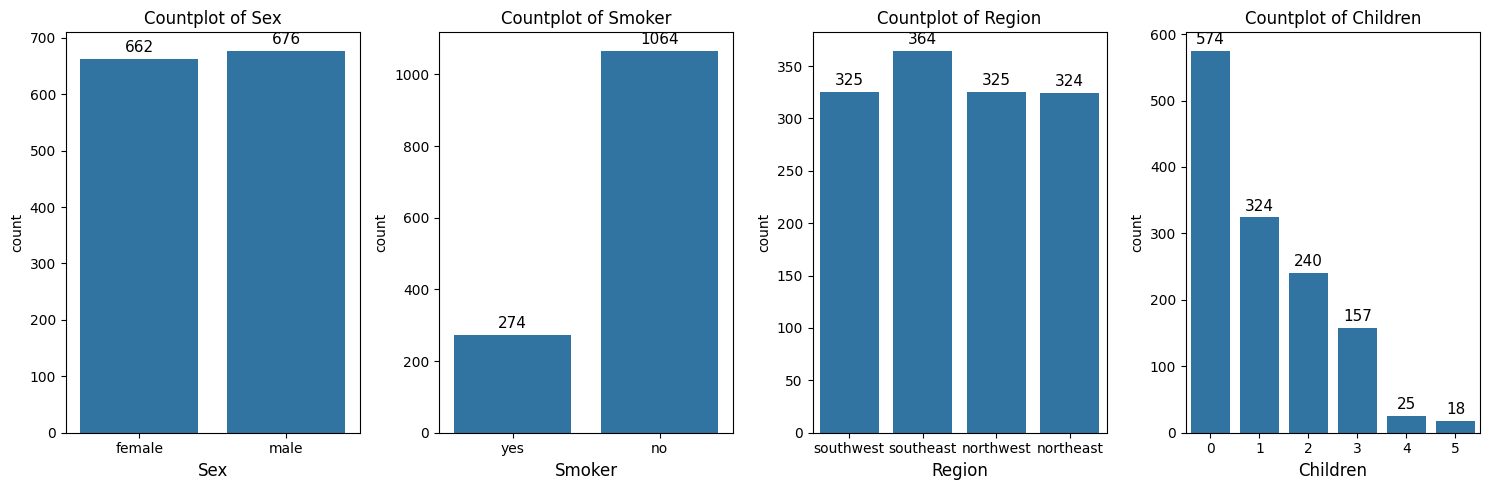

In [13]:
categorical_vars = ['sex', 'smoker', 'region', 'children']
plot_categorical_countplots(df, categorical_vars)

**Interpretation:**

Sex: Nearly equal distribution between males and females.  
Smoker: More non-smokers than smokers.  
Region: Slight variations in the number of individuals from each region.  
Children: Most individuals have 0 to 2 children  

##**Numerical Variables:**
We will explore the numerical variables to understand their distributions.



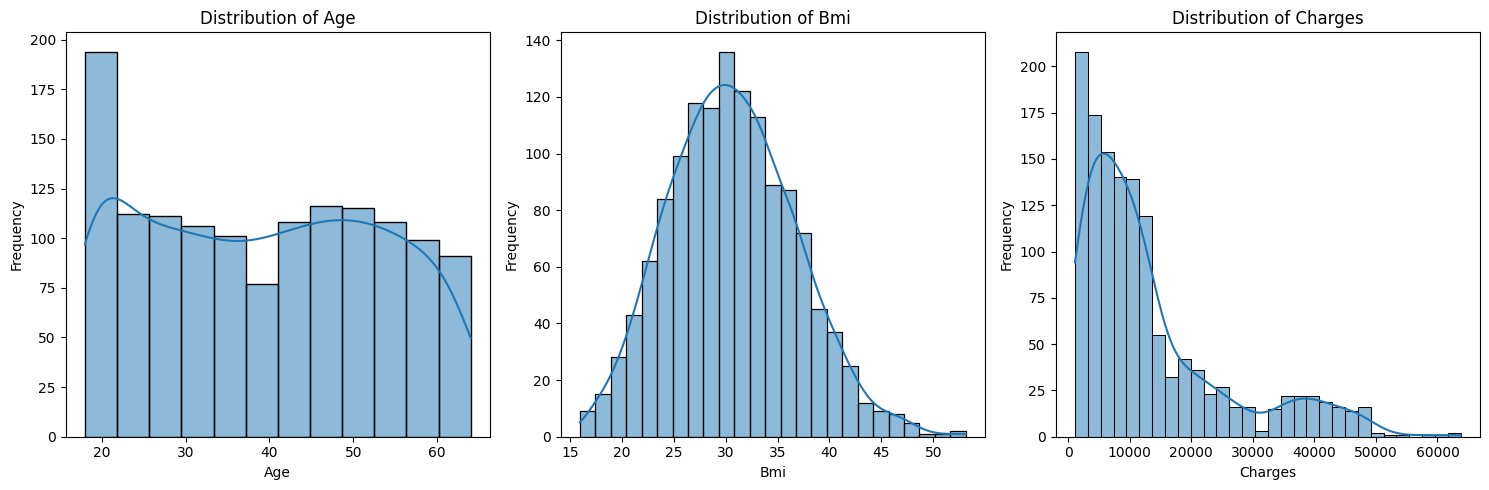

In [14]:
numerical_vars = ['age', 'bmi', 'charges']
plot_numerical_histograms(df, numerical_vars)

**interpretation:**

Age: Uniform distribution with a slight increase in the number of individuals around age 20.  
BMI: Approximately normal distribution with some skewness.  
Charges: Positively skewed distribution with a long tail towards higher charges.  


# 3. Analysis of Research Questions


## Question 1: What is the correlation between smoking and medical costs?.
Visualization: Boxplot of Charges by Smoking Status


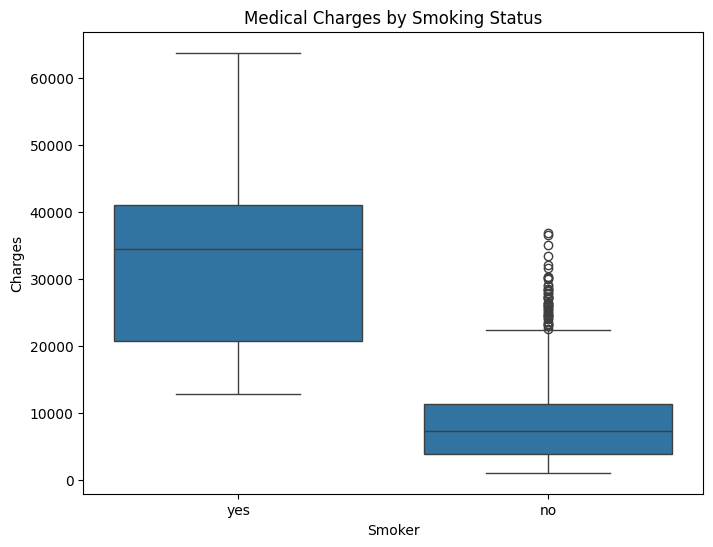

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Medical Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


*Interpretation:*

*  Smokers have significantly higher medical charges than non-smokers.
*  The median and upper quartiles for smokers are much higher.

Statistical Analysis
Descriptive Statistics

In [16]:
# Mean and median charges by smoking status
smoker_stats = df.groupby('smoker')['charges'].agg(['mean', 'median']).reset_index()
print(smoker_stats)

  smoker          mean       median
0     no   8434.268298   7345.40530
1    yes  32050.231832  34456.34845


###T-Test

In [17]:
# Separate charges for smokers and non-smokers
charges_smokers = df[df['smoker'] == 'yes']['charges']
charges_nonsmokers = df[df['smoker'] == 'no']['charges']

# Perform t-test
t_stat, p_value = ttest_ind(charges_smokers, charges_nonsmokers, equal_var=False)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

T-statistic: 32.7519
P-value: 5.8895e-103


Interpretation:  

*  The p-value is extremely low, indicating a statistically significant difference in charges between smokers and non-smokers.  
*  Smoking status has a strong positive correlation with medical charges  

### Correlation Coefficient


In [18]:
# Encode 'smoker' as 0 and 1
df['smoker_encoded'] = df['smoker'].map({'no': 0, 'yes': 1})

# Calculate Pearson correlation coefficient
correlation = df['smoker_encoded'].corr(df['charges'])
print(f"Correlation between smoking status and charges: {correlation:.4f}")

Correlation between smoking status and charges: 0.7873


** interpretation:**

*  A correlation coefficient of 0.7873 indicates a strong positive correlation between smoking status and medical charges.

# Question 2: How do medical costs compare between males and females?

##Visualization: Boxplot of Charges by Gender


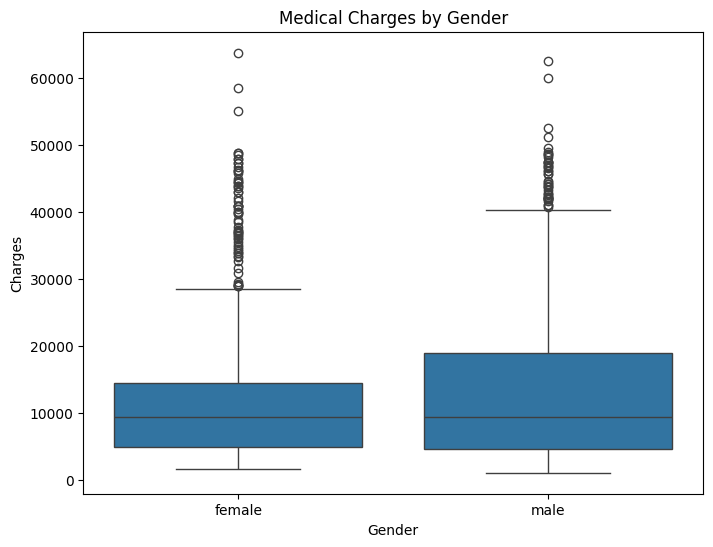

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Medical Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

**Interpretation:**

*  Males and females have similar distributions of charges.
* Slightly higher median charges for males.

##Statistical Analysis
Descriptive Statistics

In [20]:
# Mean and median charges by sex
sex_stats = df.groupby('sex')['charges'].agg(['mean', 'median']).reset_index()
print(sex_stats)

      sex          mean      median
0  female  12569.578844  9412.96250
1    male  13956.751178  9369.61575


### T-Test

In [21]:
# Separate charges for males and females
charges_male = df[df['sex'] == 'male']['charges']
charges_female = df[df['sex'] == 'female']['charges']

# Perform t-test
t_stat, p_value = ttest_ind(charges_male, charges_female, equal_var=False)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 2.1009
P-value: 0.0358


**Interpretation:**

* The p-value is 0.0359, indicating a statistically significant difference in charges between males and females at the 5% significance level.
* However, the difference is not as pronounced as with smoking status.
###Correlation Coefficient

In [22]:
# Encode 'sex' as 0 and 1
df['sex_encoded'] = df['sex'].map({'male': 0, 'female': 1})

# Calculate Pearson correlation coefficient
correlation = df['sex_encoded'].corr(df['charges'])
print(f"Correlation between gender and charges: {correlation:.4f}")

Correlation between gender and charges: -0.0573


**Interpretation:**

* A correlation coefficient of -0.0573 indicates a very weak negative correlation between gender (female) and medical charges.
* Gender alone does not have a strong impact on medical charges.


# Question 3: Based on age and gender, what combination of BMI, number of children, and smoking status results in the lowest medical costs?
Approach
We will analyze combinations of BMI, number of children, and smoking status across different age groups and genders to identify which combinations result in the lowest medical costs.

## Data Preparation
### Create Age Groups

In [23]:
# Create age bins
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 45, 60, 65], labels=['18-30', '31-45', '46-60', '61-64'])

# Define BMI categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, np.inf],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Group by relevant variables and calculate mean charges
grouped = df.groupby(['age_group', 'sex', 'bmi_category', 'children', 'smoker'])['charges'].mean().reset_index()

# Sort to find combinations with the lowest charges
lowest_charges = grouped.sort_values('charges').head(10)
print(lowest_charges)

   age_group     sex bmi_category  children smoker      charges
48     18-30    male  Underweight         0     no  1999.028633
72     18-30    male   Overweight         0     no  2105.254046
62     18-30    male       Normal         1     no  2246.743083
0      18-30  female  Underweight         0     no  2730.205050
50     18-30    male  Underweight         1     no  2775.192150
60     18-30    male       Normal         0     no  2818.824376
2      18-30  female  Underweight         1     no  2876.362425
84     18-30    male        Obese         0     no  3221.634208
26     18-30  female   Overweight         1     no  3485.715717
36     18-30  female        Obese         0     no  3560.598271


<ipython-input-23-d911d6f5907e>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', 'sex', 'bmi_category', 'children', 'smoker'])['charges'].mean().reset_index()


**interpretation:**

The lowest charges are associated with:

Age Group: 18-30  
Sex: Both males and females  
BMI Category: Underweight and Normal  
Children: 0 or 1  
Smoker: No  
Conclusion: Young, non-smoking individuals with lower BMI and fewer children   tend to have the lowest medical costs.  

**Visualization**  
Heatmap of Average Charges by BMI Category and Smoking Status

<ipython-input-24-cd2a7514919e>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='charges', index='bmi_category', columns='smoker', aggfunc='mean')


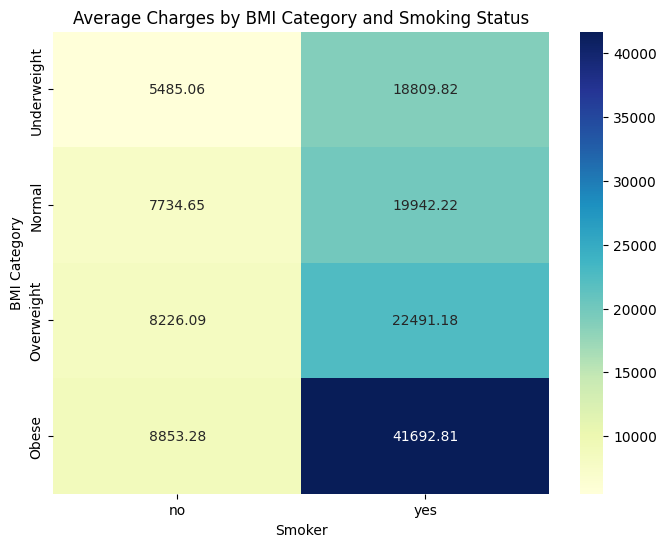

In [24]:
# Pivot table
pivot_table = df.pivot_table(values='charges', index='bmi_category', columns='smoker', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Charges by BMI Category and Smoking Status')
plt.ylabel('BMI Category')
plt.xlabel('Smoker')
plt.show()

**Interpretation:**

* Charges are significantly higher for smokers across all BMI categories.
* Within non-smokers, charges increase with higher BMI categories but not drastically.

#4. Data Preprocessing for Modeling with pipelines
To build predictive models, we need to preprocess the data appropriately.

**Encoding Categorical Variables**
We will use OneHotEncoder for all categorical variables to avoid introducing ordinal relationships.

In [25]:
# Define features and target
X = df.drop(['charges', 'smoker_encoded', 'sex_encoded'], axis=1)
y = df['charges']

# List of numerical and categorical features
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(drop='first')  # Drop first to avoid multicollinearity

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

split the data

In [26]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(10)

,age,sex,bmi,children,smoker,region,age_group,bmi_category
560,46,female,19.950,2,no,northwest,46-60,Normal
1285,47,female,24.320,0,no,northeast,46-60,Normal
1142,52,female,24.860,0,no,southeast,46-60,Normal
969,39,female,34.320,5,no,southeast,31-45,Obese
486,54,female,21.470,3,no,northwest,46-60,Normal
170,63,male,41.470,0,no,southeast,61-64,Obese
277,22,female,24.300,0,no,southwest,18-30,Normal
1033,18,male,21.565,0,yes,northeast,18-30,Normal
209,40,male,41.230,1,no,northeast,31-45,Obese
947,37,male,34.200,1,yes,northeast,31-45,Obese


#5. Modeling
We will try different regression models to predict medical charges.

## Model Evaluation

In [27]:
# List of models to test
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
}

# Dictionary to store results
results = {}

# Evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # For Neural Network, reverse log transform if used
    if name == "Neural Network":
        y_pred = np.expm1(y_pred)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'MAE': mae, 'R²': r2}
    print(f"{name} - MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

Linear Regression - MSE: 33596915.85, MAE: 4181.19, R²: 0.7836
Random Forest - MSE: 20864569.51, MAE: 2543.98, R²: 0.8656
Gradient Boosting - MSE: 18745176.48, MAE: 2443.48, R²: 0.8793
XGBoost - MSE: 20405869.28, MAE: 2500.54, R²: 0.8686


### Model Comparison

Linear Regression - MSE: 33596915.85, MAE: 4181.19, R²: 0.7836  
Random Forest - MSE: 20864569.51, MAE: 2543.98, R²: 0.8656  
Gradient Boosting - MSE: 18745176.48, MAE: 2443.48, R²: 0.8793  
XGBoost - MSE: 20405869.28, MAE: 2500.54, R²: 0.8686  

**Interpretation:**

Gradient Boosting Regressor performs the best among the three models, with the lowest MSE, MAE and highest R².  
This suggests that Gradient Boosting captures the non-linear relationships in the data better than Linear Regression.  


## Gradient Boosting Pipeline


### Gradient Boosting Hyperparameter

In [28]:
# Commented out because the time to run

# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.ensemble import GradientBoostingRegressor

# # Define parameter grid for Gradient Boosting
# param_grid = {
#     'model__n_estimators': [270, 280, 290, 300, 310, 400, 500, 1000],
#     'model__learning_rate': [0.01, 0.014, 0.015, 0.016, 0.05, 0.1, 0.2],
#     'model__max_depth': [2, 3, 4, 5, 7, 10],
# }

# # Define the Gradient Boosting pipeline
# gb_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', GradientBoostingRegressor(random_state=42))
# ])

# # Use GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(
#     estimator=gb_pipeline,
#     param_grid=param_grid,
#     cv=5,  # 5-fold cross-validation
#     scoring='r2',  # Optimize for R²
#     n_jobs=-1,  # Use all processors
#     verbose=1  # Display progress
# )

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best pipeline
# best_params = grid_search.best_params_
# best_pipeline = grid_search.best_estimator_

# # Make predictions with the best pipeline
# y_pred_gb = best_pipeline.predict(X_test)

# # Evaluate metrics
# mse_gb = mean_squared_error(y_test, y_pred_gb)
# mae_gb = mean_absolute_error(y_test, y_pred_gb)
# r2_gb = r2_score(y_test, y_pred_gb)

# print("Best parameters:", best_params)
# print(f"Optimized Gradient Boosting - MSE: {mse_gb:.2f}, MAE: {mae_gb:.2f}, R²: {r2_gb:.4f}")

### Gradient Boosting with Optimized Hyperparameters

In [29]:
# Gradient Boosting pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=290, random_state=42, learning_rate=0.015, max_depth=3))
])

# Fit the model
gb_pipeline.fit(X_train, y_train)

# Predict
y_pred_gb = gb_pipeline.predict(X_test)

# Evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb:.2f}, MAE: {mae_gb:.2f}, R^2: {r2_gb:.4f}")

Gradient Boosting - MSE: 18851517.00, MAE: 2500.33, R^2: 0.8786


## Cross Validation

In [30]:
cv_scores = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring='r2')
cv_predictions = cross_val_predict(gb_pipeline, X_train, y_train, cv=5)

mse_cv = mean_squared_error(y_train, cv_predictions)
mae_cv = mean_absolute_error(y_train, cv_predictions)
r2_cv = r2_score(y_train, cv_predictions)

cv_results = {
    "Cross-Validation R2 Scores": cv_scores,
    "Mean CV R2": np.mean(cv_scores),
    "MSE (Cross-Validation)": mse_cv,
    "MAE (Cross-Validation)": mae_cv,
    "R2 (Cross-Validation Predictions)": r2_cv
}

cv_results

{'Cross-Validation R2 Scores': array([0.83883187, 0.92184001, 0.83147293, 0.79634304, 0.8502874 ]),
 'Mean CV R2': 0.8477550518510186,
 'MSE (Cross-Validation)': 21499132.347826976,
 'MAE (Cross-Validation)': 2649.393359226223,
 'R2 (Cross-Validation Predictions)': 0.8510455702567701}

## Feature Importance for gradient boosting

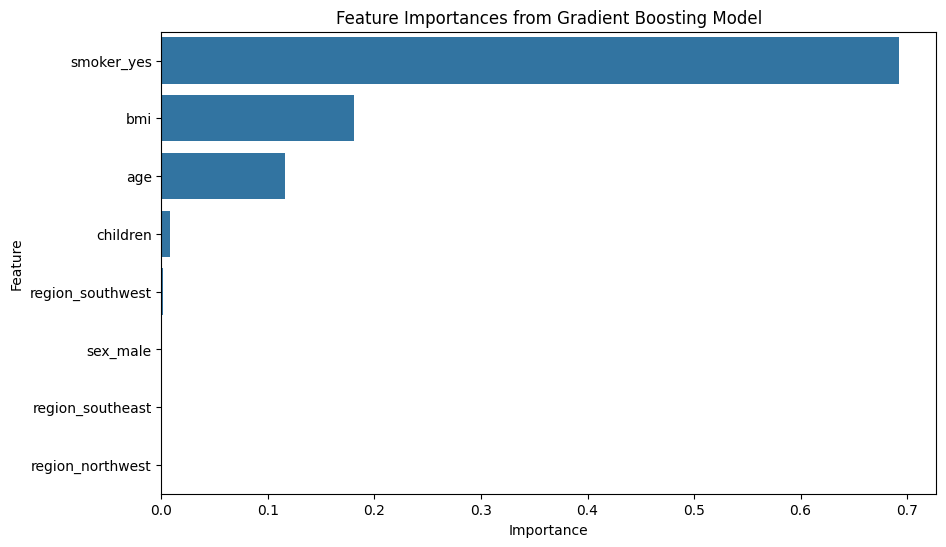

In [31]:
# Get feature names after preprocessing
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numeric_features + list(onehot_feature_names)

# Get feature importances
importances = gb_pipeline.named_steps['model'].feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importances from Gradient Boosting Model')
plt.show()

**Interpretation:**

Smoking status is the most important feature influencing medical charges. Age and BMI are also significant predictors. Region and sex have less influence.

# Results

**Purpose:** The residual plot shows the differences between actual and predicted values (residuals). A good model will have residuals randomly scattered around zero, indicating no bias in predictions.

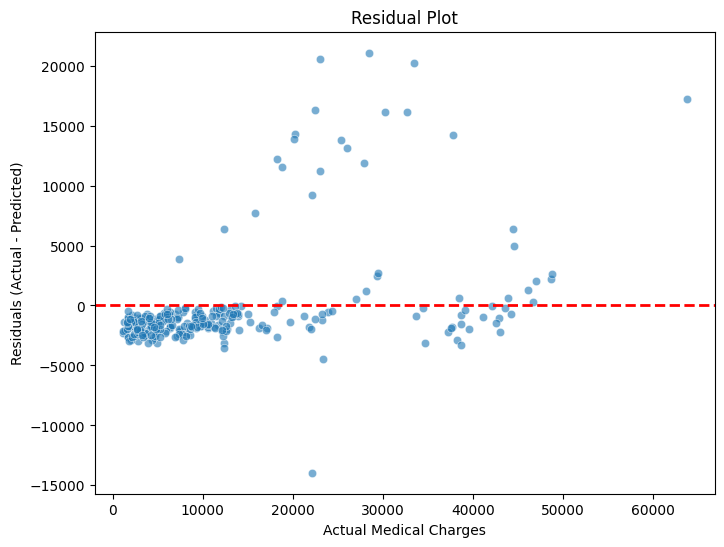

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred_gb

# Create residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Medical Charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

**Purpose:** This scatter plot compares the actual medical charges to the predicted charges. Points closer to the diagonal red line indicate more accurate predictions. It visually evaluates how well the model predicts outcomes

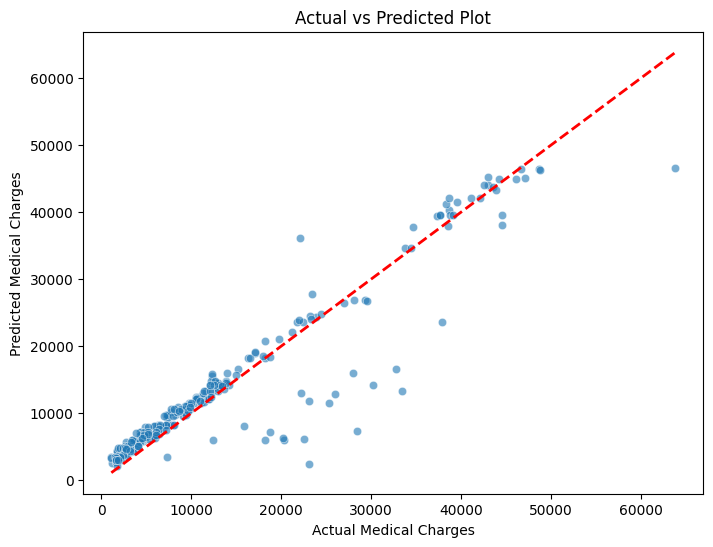

In [33]:
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # Line for perfect predictions
plt.xlabel("Actual Medical Charges")
plt.ylabel("Predicted Medical Charges")
plt.title("Actual vs Predicted Plot")
plt.show()


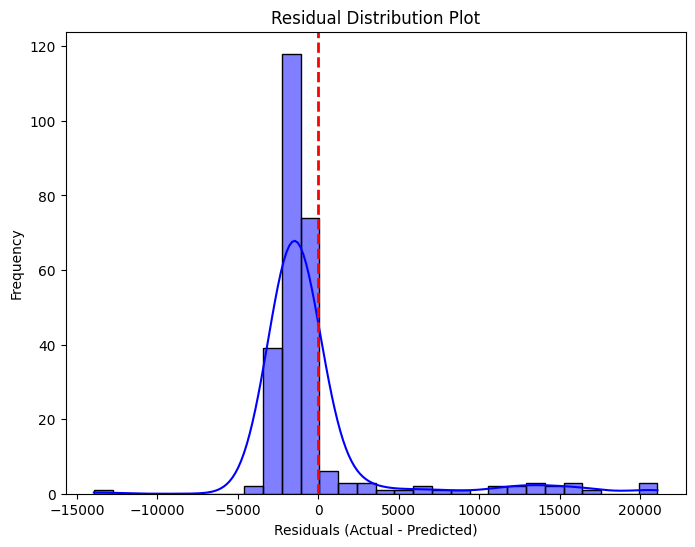

In [34]:
# Residual Distribution Plot
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution Plot")
plt.show()


 # Conclusion

## Summary of Findings
The analysis of the Medical Cost Personal Datasets revealed several key insights into factors influencing medical costs:

1. **Smoking Status**:
   - Smoking is the most significant predictor of increased medical costs.
   - Smokers incur significantly higher medical charges compared to non-smokers, as confirmed by statistical analysis (t-test and correlation).
   - This highlights the financial burden associated with smoking, beyond its well-known health risks.

2. **Gender**:
   - Gender differences in medical costs are statistically significant but less pronounced than smoking.
   - Males tend to have slightly higher median charges compared to females, though the correlation is weak.

3. **Age, BMI, and Number of Children**:
   - The combination of young age (18–30), normal or underweight BMI, fewer children (0–1), and non-smoking status results in the lowest medical costs.
   - These findings underscore the importance of maintaining a healthy BMI and avoiding smoking to reduce medical expenses.

4. **Modeling Results**:
   - Gradient Boosting Regressor outperformed other models (Linear Regression, Random Forest, XGBoost) with the lowest MSE and MAE, and the highest R².
   - Feature importance analysis confirmed that smoking status, BMI, and age are the top predictors of medical costs.

## Implications
By combining statistical analysis and machine learning, this study provides actionable insights into the factors of medical costs, paving the way for informed decision-making to decrease individuals medical costs.
